In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from pandas import set_option
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import SGD

In [2]:
# read data with pandas
my_data=pd.read_csv("hypothyroid.csv")
my_data.shape

(3772, 30)

In [3]:
my_data.head(10)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
5,18,F,t,f,f,f,f,f,f,f,...,t,183,t,1.3,t,141,f,?,other,P
6,59,F,f,f,f,f,f,f,f,f,...,t,72,t,0.92,t,78,f,?,other,P
7,80,F,f,f,f,f,f,f,f,f,...,t,80,t,0.7,t,115,f,?,SVI,P
8,66,F,f,f,f,f,f,f,f,f,...,t,123,t,0.93,t,132,f,?,SVI,P
9,68,M,f,f,f,f,f,f,f,f,...,t,83,t,0.89,t,93,f,?,SVI,P


In [4]:
types=my_data.dtypes
print(types)

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

In [5]:
print(my_data.isna().sum())

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64


In [6]:
outcome_counts = my_data.groupby("binaryClass").size()
print(outcome_counts)

binaryClass
N     291
P    3481
dtype: int64


In [7]:
label_encoders = {}
np.set_printoptions(suppress=True)
for column in my_data.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()  
    my_data[column] = encoder.fit_transform(my_data[column])  
    label_encoders[column] = encoder 
my_data.fillna(my_data.mean(), inplace=True)
my_data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,34,1,0,0,0,0,0,0,0,0,...,1,28,1,72,1,10,0,0,1,1
1,15,1,0,0,0,0,0,0,0,0,...,1,3,0,146,0,234,0,0,4,1
2,40,2,0,0,0,0,0,0,0,0,...,1,10,1,48,1,22,0,0,4,1
3,67,1,1,0,0,0,0,0,0,0,...,1,83,0,146,0,234,0,0,4,1
4,67,1,0,0,0,0,0,0,0,0,...,1,201,1,44,1,199,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,22,1,0,0,0,0,0,0,0,0,...,0,241,0,146,0,234,0,0,4,1
3768,64,1,0,0,0,0,0,0,0,0,...,1,27,1,66,1,16,0,0,3,1
3769,71,1,0,0,0,0,0,0,0,0,...,1,14,1,65,1,6,0,0,4,1
3770,69,2,0,0,0,0,0,0,0,0,...,1,222,1,51,1,219,0,0,3,1


In [8]:
x=my_data[["age","sex","on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","query hypothyroid","lithium","goitre",	"tumor","hypopituitary","psych","TSH measured","TSH","T3 measured","T3","TT4 measured",	"TT4","T4U measured","T4U",	"FTI measured","FTI","TBG measured","TBG","referral source"]]
y=my_data[["binaryClass"]]
x

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source
0,34,1,0,0,0,0,0,0,0,0,...,27,1,28,1,72,1,10,0,0,1
1,15,1,0,0,0,0,0,0,0,0,...,22,1,3,0,146,0,234,0,0,4
2,40,2,0,0,0,0,0,0,0,0,...,69,1,10,1,48,1,22,0,0,4
3,67,1,1,0,0,0,0,0,0,0,...,20,1,83,0,146,0,234,0,0,4
4,67,1,0,0,0,0,0,0,0,0,...,12,1,201,1,44,1,199,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,22,1,0,0,0,0,0,0,0,0,...,69,0,241,0,146,0,234,0,0,4
3768,64,1,0,0,0,0,0,0,0,0,...,23,1,27,1,66,1,16,0,0,3
3769,71,1,0,0,0,0,0,0,0,0,...,19,1,14,1,65,1,6,0,0,4
3770,69,2,0,0,0,0,0,0,0,0,...,22,1,222,1,51,1,219,0,0,3


In [9]:
# correlations
set_option("display.width", 200)
set_option("display.precision", 3)
correlations = my_data.corr(method="pearson") 
print(correlations)

                             age    sex  on thyroxine  query on thyroxine  on antithyroid medication       sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  TT4 measured  \
age                        1.000  0.017         0.022              -0.019                     -0.068  8.459e-02    -0.123       -3.218e-02       6.050e-02              0.042  ...         0.067   
sex                        0.017  1.000        -0.079               0.044                     -0.016  1.137e-02    -0.069       -2.558e-02      -2.663e-02             -0.028  ...         0.078   
on thyroxine               0.022 -0.079         1.000               0.006                     -0.002 -4.205e-02     0.010        3.758e-02       6.337e-02              0.094  ...         0.025   
query on thyroxine        -0.019  0.044         0.006               1.000                     -0.012  1.259e-02     0.045        5.858e-03      -1.461e-02             -0.030  ...         0.030   
on antithyroid medic

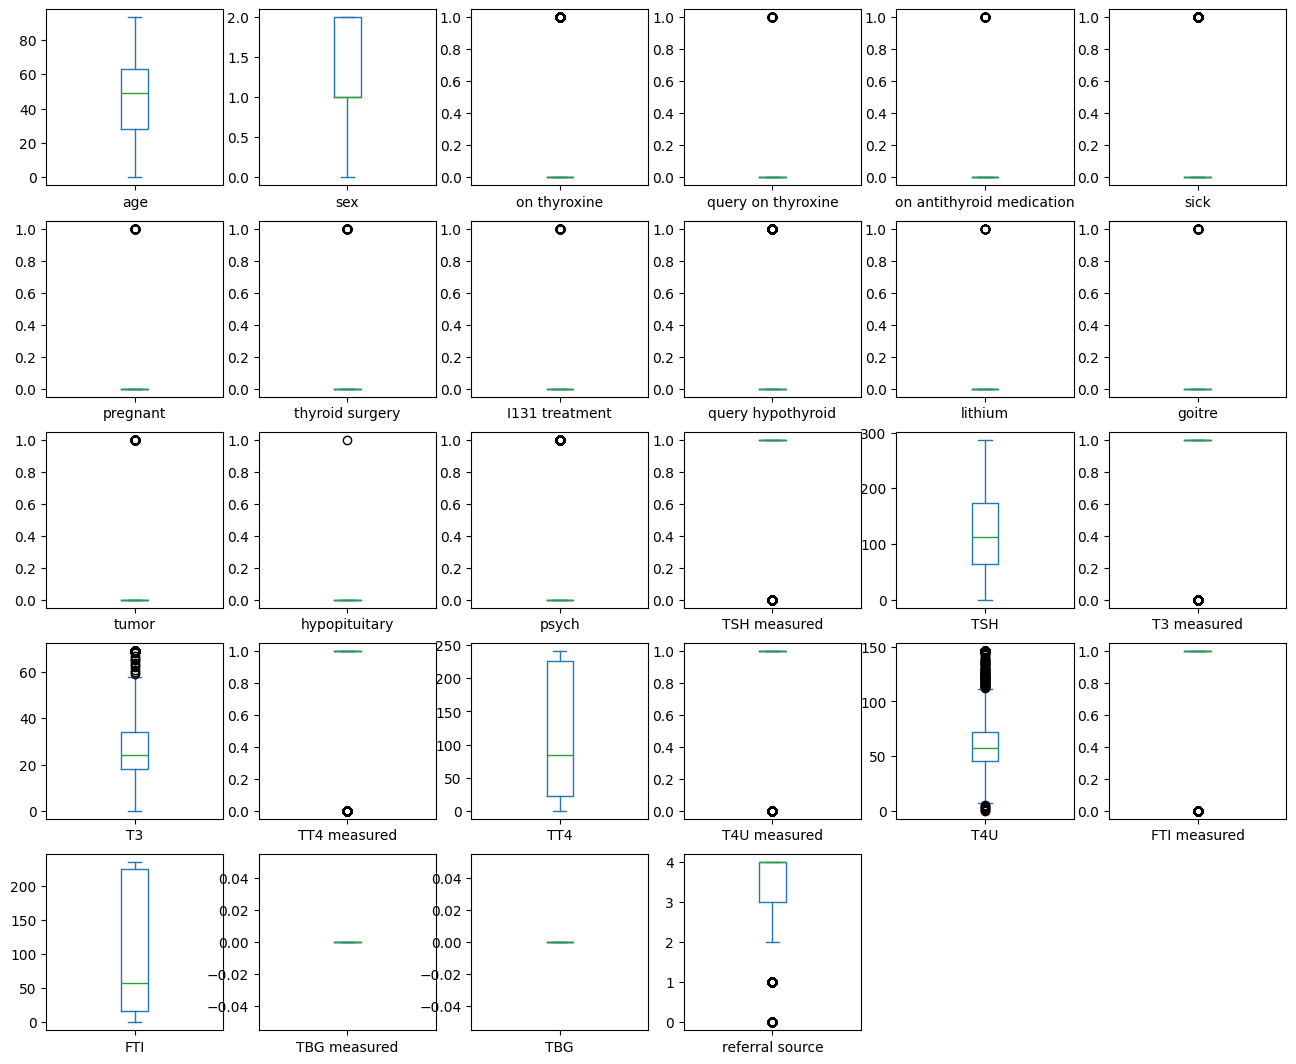

In [10]:
x.plot(kind="box", subplots=True, layout=(6,6), sharex=False, sharey=False, figsize=(16,16))
plt.show()

(3772, 28)

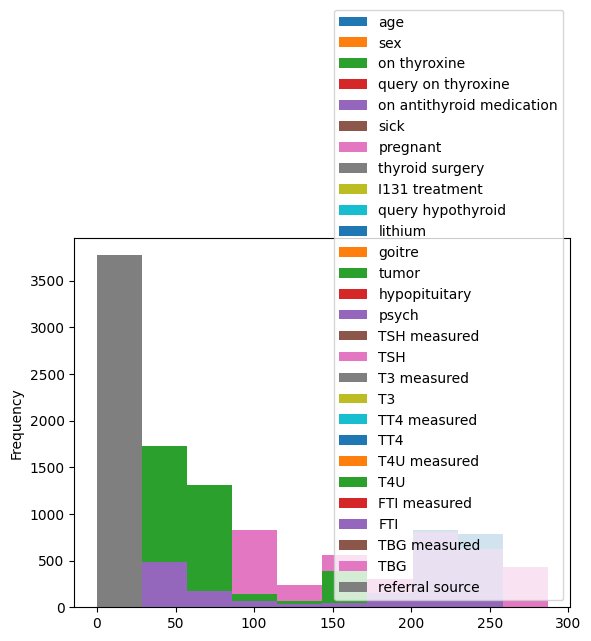

In [11]:
x.plot.hist()
x.shape

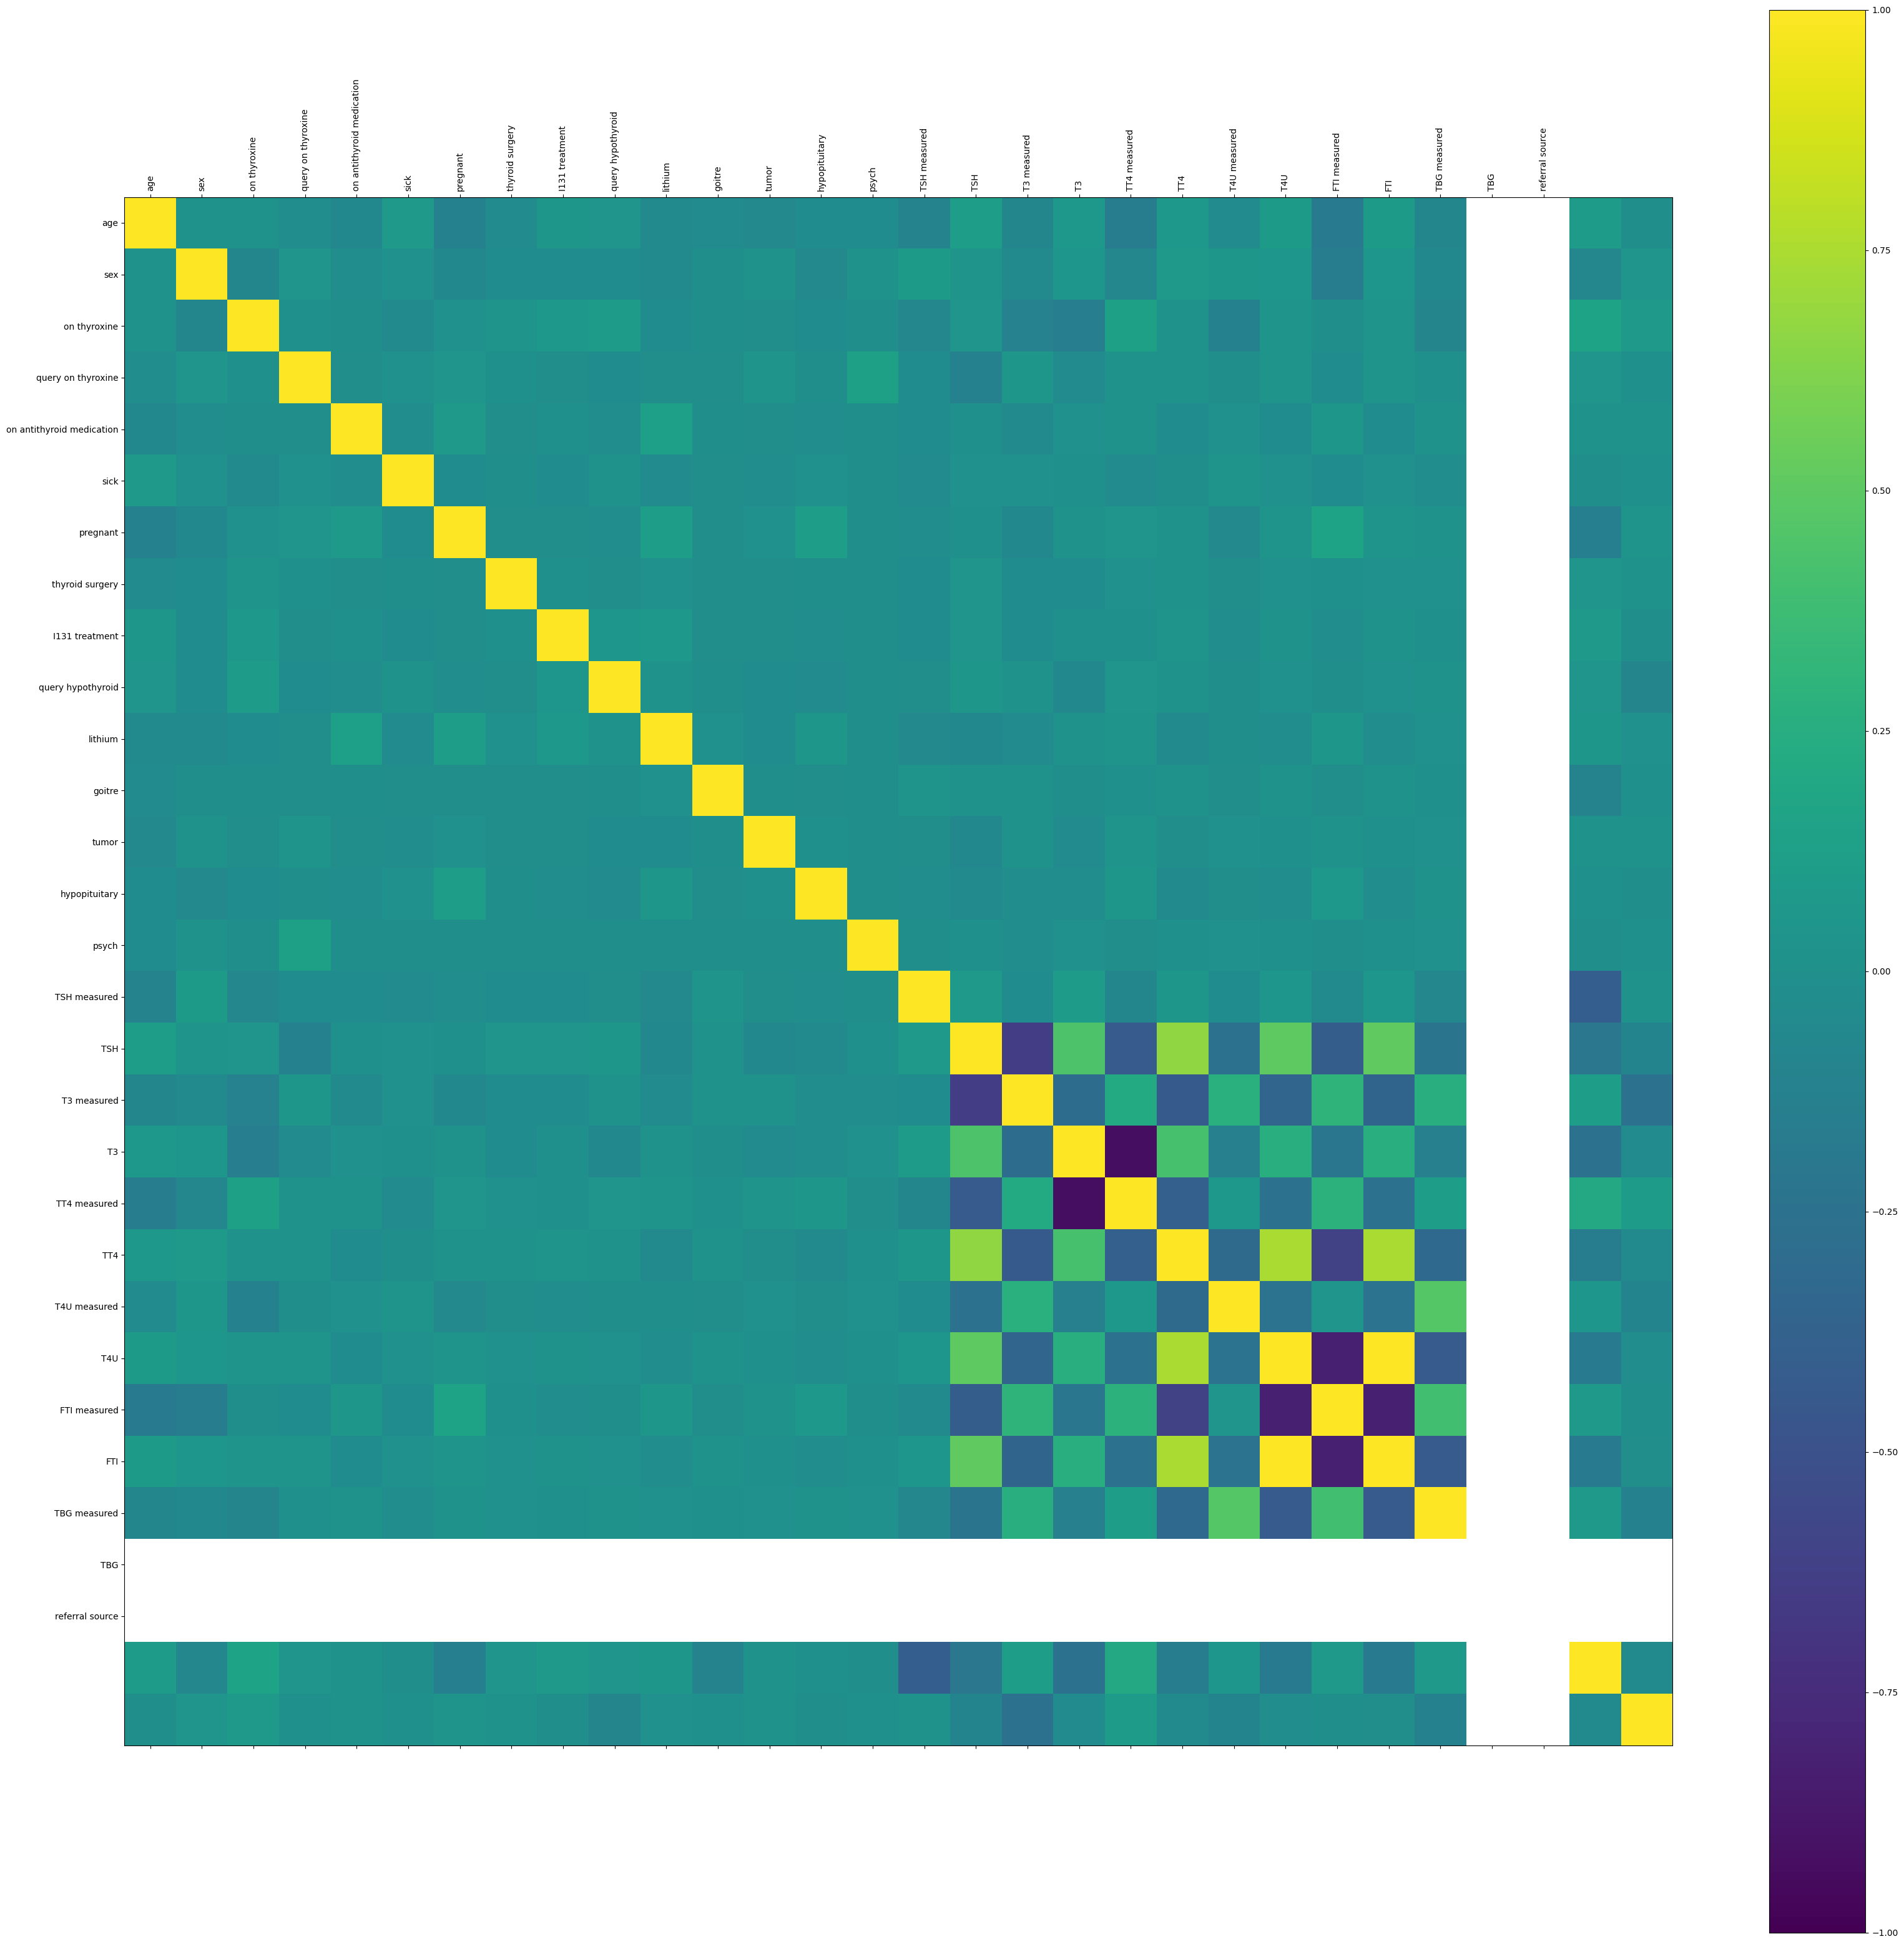

In [12]:
myfig = plt.figure(figsize=(40,40))
axis = myfig.add_subplot(111)
cax = axis.matshow(correlations, vmin=-1, vmax=1)
myfig.colorbar(cax)
names = ["age","sex","on thyroxine","query on thyroxine","on antithyroid medication","sick","pregnant","thyroid surgery","I131 treatment","query hypothyroid","lithium","goitre","tumor","hypopituitary","psych","TSH measured","TSH","T3 measured","T3","TT4 measured","TT4","T4U measured","T4U","FTI measured","FTI","TBG measured","TBG","referral source"]
ticks = np.arange(len(names))  
axis.set_xticks(ticks)
axis.set_yticks(ticks)
axis.set_xticklabels(names, rotation=90)
axis.set_yticklabels(names)
plt.show()

In [13]:
# scaler of data
from sklearn.preprocessing import MinMaxScaler
data_values=my_data.values
x_scaler=data_values[:,0:29]
y_scaler=data_values[:,29]
mydataScaler = MinMaxScaler(feature_range = (0, 1))
mydataRescaled = mydataScaler.fit_transform(x_scaler)
mydataRescaled

array([[0.3655914 , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.16129032, 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.43010753, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.76344086, 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.74193548, 1.        , 0.        , ..., 0.        , 0.        ,
        0.75      ],
       [0.64516129, 0.5       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [14]:
# Normlize of data
from sklearn.preprocessing import Normalizer
data_values=my_data.values
x_normal=data_values[:,0:29]
y_normal=data_values[:,29]
my_normalize=Normalizer()
my_normal_data=my_normalize.fit_transform(x_normal)
my_normal_data

array([[0.24005649, 0.00706049, 0.        , ..., 0.        , 0.        ,
        0.00706049],
       [0.04426435, 0.00295096, 0.        , ..., 0.        , 0.        ,
        0.01180383],
       [0.28368081, 0.01418404, 0.        , ..., 0.        , 0.        ,
        0.02836808],
       ...,
       [0.29633279, 0.0041737 , 0.        , ..., 0.        , 0.        ,
        0.0166948 ],
       [0.20735218, 0.00601021, 0.        , ..., 0.        , 0.        ,
        0.00901531],
       [0.16762393, 0.00279373, 0.        , ..., 0.        , 0.        ,
        0.01117493]])

In [15]:
# Binarizer of data
from sklearn.preprocessing import Binarizer
data_values=my_data.values
x_binarizer=data_values[:,0:29]
y_binarizer=data_values[:,29]
my_Binarizer=Binarizer()
my_binarizer_data=my_Binarizer.fit_transform(x_binarizer)
my_binarizer_data

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1]])

In [16]:
# feature extraction with Univariate
data_values=my_data.values
x_data=data_values[:,0:29]
y_data=data_values[:,29]
my_feature_selection=SelectKBest(score_func = f_classif, k = 4)
feature_of_selection=my_feature_selection.fit(x_data,y_data)
set_printoptions(precision = 3)
print(feature_of_selection.scores_)

[  0.089   6.924  24.936   0.209   1.774   0.012   4.497   1.173   0.049
  28.276   0.682   0.118   2.869   0.053   0.084   3.081  34.487 249.971
   4.077  37.359  10.671  36.013   0.953   0.057   0.898  57.185     nan
     nan   6.526]


D:\master_of_uni_tabriz\یادگیری عمیق و شبکه عصبی\project\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [26 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
D:\master_of_uni_tabriz\یادگیری عمیق و شبکه عصبی\project\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [17]:
# Recursive feature elimination
data_values = my_data.values
x_data = data_values[:,0:16]
y_data = data_values[:,16]
model = LogisticRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(x_data, y_data)
print("Number of features: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

D:\master_of_uni_tabriz\یادگیری عمیق و شبکه عصبی\project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of features: 4
Selected features are denoted by True: [False False False  True False False False  True  True False False False
 False False False  True]
Feature Ranking: [13 10  8  1 11  9  7  1  1  3  4  6  2  5 12  1]


In [18]:
# Principal component analysis
data_values = my_data.values
x_data = data_values[:,0:29]
y_data = data_values[:,29]
pca = PCA(n_components = 12)
principal_components = pca.fit_transform(x_data)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print(pca.components_)

Explained Variance Ratio: [0.548 0.209 0.185 0.03  0.015 0.012 0.    0.    0.    0.    0.    0.   ]
[[-0.014 -0.    -0.     0.     0.     0.    -0.    -0.    -0.     0.
  -0.     0.     0.     0.     0.    -0.    -0.001  0.345 -0.001  0.026
  -0.001  0.665 -0.001  0.084 -0.001  0.657  0.     0.     0.001]
 [-0.016 -0.    -0.     0.    -0.    -0.    -0.    -0.    -0.     0.
  -0.     0.     0.    -0.    -0.    -0.    -0.002  0.927 -0.001  0.052
  -0.001 -0.296 -0.001  0.099 -0.001 -0.202  0.     0.     0.001]
 [-0.015 -0.001  0.    -0.     0.    -0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.    -0.     0.    -0.082  0.     0.017
  -0.    -0.679 -0.001  0.177 -0.001  0.707 -0.    -0.     0.   ]
 [-0.221 -0.002  0.001 -0.     0.    -0.     0.001  0.    -0.    -0.
   0.001 -0.     0.     0.     0.    -0.    -0.003 -0.122 -0.004  0.287
  -0.004  0.094 -0.007  0.905 -0.007 -0.162  0.     0.     0.001]
 [ 0.867 -0.001 -0.001 -0.    -0.     0.001 -0.    -0.     0.     0.
  -

In [19]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(x_data)
print (selectedFeatures.shape)

(3772, 3)


In [20]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(x_data)
print (selectedFeatures.shape)

(3772, 5)


In [21]:
data_values = my_data.values
x_data = data_values[:,0:29]
y_data = data_values[:,29]
model = ExtraTreesClassifier()
model.fit(x_data, y_data)
print(model.feature_importances_)

[0.082 0.031 0.018 0.002 0.001 0.009 0.001 0.007 0.006 0.017 0.009 0.001
 0.001 0.007 0.    0.005 0.036 0.289 0.012 0.1   0.005 0.109 0.005 0.08
 0.005 0.125 0.    0.    0.036]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Epoch 1/50


D:\master_of_uni_tabriz\یادگیری عمیق و شبکه عصبی\project\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8200 - loss: 0.4664 - val_accuracy: 0.9156 - val_loss: 0.2481
Epoch 2/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9243 - loss: 0.2270 - val_accuracy: 0.9156 - val_loss: 0.2158
Epoch 3/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9358 - loss: 0.1834 - val_accuracy: 0.9139 - val_loss: 0.1979
Epoch 4/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9282 - loss: 0.1828 - val_accuracy: 0.9189 - val_loss: 0.1868
Epoch 5/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9347 - loss: 0.1731 - val_accuracy: 0.9288 - val_loss: 0.1789
Epoch 6/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9386 - loss: 0.1711 - val_accuracy: 0.9321 - val_loss: 0.1742
Epoch 7/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9369 - loss: 0.1671 - val_accuracy: 0.9371 - val_loss: 0.1712
Epoch 8/50
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9552 - loss: 0.1428 - val_accuracy: 0.9404 - val_